# Test time-to-ELM target on real data

In [1]:
import numpy as np
import logging

import torch
# from torch.utils.data import DataLoader
# import torch.nn.functional as F
# import torch.nn as nn
# import torch.optim as optim

from tqdm import tqdm

import sys
sys.path.append("/home/rkube/repos/frnn-loader")

import matplotlib.pyplot as plt

In [3]:
logging.basicConfig(filename="test_TTELM.log",
                    format="%(asctime)s    %(message)s",
                    encoding="utf-8",
                    level=logging.INFO)

In [4]:
from frnn_loader.backends.fetchers import fetcher_d3d_v1
from frnn_loader.backends.backend_hdf5 import backend_hdf5
from frnn_loader.primitives.filters import filter_ip_thresh
from frnn_loader.primitives.resamplers import resampler_causal
from frnn_loader.primitives.signal import signal_0d
from frnn_loader.primitives.targets import target_TTELM, target_NULL
from frnn_loader.loaders.frnn_dataset_disk import shot_dataset_disk

from frnn_loader.utils.errors import SignalCorruptedError, NotDownloadedError

In [5]:
root = "/projects/FRNN/frnn_loader"

# 1/ Describe the dataset
predictor_tags = (
    "q95",
    "efsli",
    "ipspr15V",
    "fs07",
    "efsbetan",
    "efswmhd",
    "dssdenest",
    "pradcore",
    "pradedge",
    "bmspinj",
    "bmstinj",
    "ipsiptargt",
    "ipeecoil",
)
predictor_list = tuple([signal_0d(tag) for tag in predictor_tags])


shotnr = 174829

In [6]:
# Instantiate the filter we use to crimp the shot times
dt = 1.0 # Time used for resampling
ip_filter = filter_ip_thresh(0.2)
signal_ip = signal_0d("ipspr15V")
my_backend = backend_hdf5(root)
my_fetcher = fetcher_d3d_v1()
my_resampler = resampler_causal(0.0, 5000.0, dt)


In [7]:
ds = shot_dataset_disk(shotnr, 
    predictors=predictor_list,
    resampler=my_resampler,
    backend_file=my_backend,
    fetcher=my_fetcher,
    root=root,
    download=True,
    normalizer=None,
    is_disruptive=False,
    target=target_TTELM,
    dtype=torch.float32)


In [8]:
target = ds[:][1];

KeyError: "Unable to open object (object 'target' doesn't exist)"

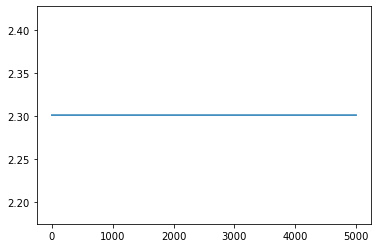

In [8]:
plt.plot(target)

In [13]:
res = [p for p in predictor_list if p == signal_0d("efsli")]

In [16]:
predictor_list.index(signal_0d("qmin"))

ValueError: tuple.index(x): x not in tuple

In [17]:
label = "foo"

In [18]:
label + "" == label

True

In [19]:
label + None

TypeError: can only concatenate str (not "NoneType") to str

In [21]:
isinstance(TypeError, Error)

NameError: name 'Error' is not defined

In [22]:
label.info

AttributeError: 'str' object has no attribute 'info'

In [23]:
import h5py

In [24]:
with h5py.File("/projects/FRNN/frnn_loader/eqn0b34y.h5", "r") as fp:
    fp["/foo"]

KeyError: "Unable to open object (object 'foo' doesn't exist)"